# Quantitative exercise

Please make sure you download and extract the [Make3D](http://make3d.cs.cornell.edu/data.html) dataset in the `images` folder before running this notebook. You will need both training images and the respective depth maps from Dataset 1.

The goal of this exercise is computing some initial analysis and statistics of the datasets we identified for our project.


Authors: Andrea Nardelli, Tianze Wang

In [1]:
%matplotlib inline

from pathlib import Path
from matplotlib import pyplot as plt
from scipy.io import loadmat
from scipy import stats
import h5py
import numpy as np

In [3]:
p = Path('images')
images = p.glob('*.jpg')

img = next(images)

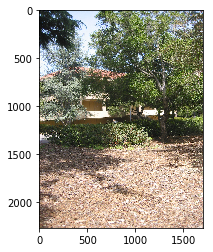

In [4]:
img_data = plt.imread(img)
plt.imshow(img_data)

In [13]:
img_data.shape

(2272, 1704, 3)

In [23]:
depthmap['Position3DGrid'].shape

(55, 305, 4)

In [24]:
55*305*4

67100

In [25]:
2272*1704

3871488

In [10]:
depthmap=loadmat(f'images/Train400Depth/depth_sph_corr{img.stem[3:]}.mat')

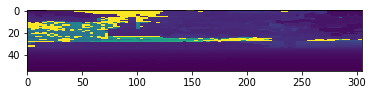

In [28]:
plt.imshow(depthmap['Position3DGrid'][:,:,3]) # ??? wonder what's going on here, probably need to normalize values and reshuffle dimensions

## TODO

## NYU Depth V2 Dataset

In [2]:
dataset_path = 'nyu_depth_v2_labeled.mat'
NYU_Depth_v2 = h5py.File(dataset_path, 'r')

In [3]:
print('NYU_Depth_v2[\'images\'].shape', NYU_Depth_v2['images'].shape)
print('NYU_Depth_v2[\'depths\'].shape', NYU_Depth_v2['depths'].shape)

NYU_Depth_v2['images'].shape (1449, 3, 640, 480)
NYU_Depth_v2['depths'].shape (1449, 640, 480)


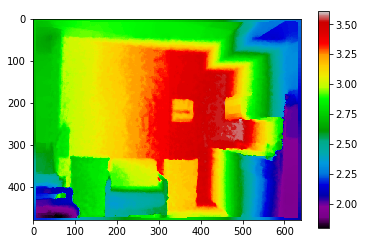

In [4]:
sample_depth = NYU_Depth_v2['depths'][0].transpose()
imgplot = plt.imshow(sample_depth)
imgplot.set_cmap('nipy_spectral')
plt.colorbar()

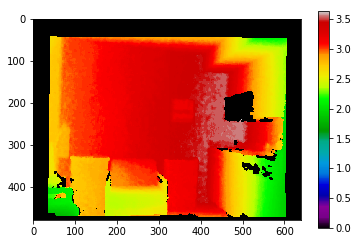

In [5]:
sample_raw_depth = NYU_Depth_v2['rawDepths'][0].transpose()
imgplot = plt.imshow(sample_raw_depth)
imgplot.set_cmap('nipy_spectral')
plt.colorbar()

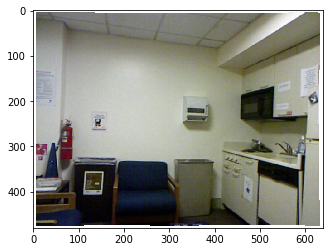

In [6]:
img = NYU_Depth_v2['images'][0]
# reshape due to different order
img_ = np.empty([480, 640, 3])
img_[:,:,0] = img[0,:,:].T
img_[:,:,1] = img[1,:,:].T
img_[:,:,2] = img[2,:,:].T
img_ = (img_/255).astype('float32')

plt.imshow(img_)

(array([2.6630e+03, 3.2590e+03, 4.0990e+03, 4.1230e+03, 4.5850e+03,
        4.8650e+03, 5.0130e+03, 4.6400e+03, 4.6220e+03, 4.2810e+03,
        4.2220e+03, 4.0950e+03, 4.1800e+03, 4.2460e+03, 4.2490e+03,
        4.2540e+03, 4.3420e+03, 4.3380e+03, 4.2630e+03, 3.8810e+03,
        3.6690e+03, 3.4540e+03, 3.2420e+03, 3.1070e+03, 2.7820e+03,
        2.7080e+03, 2.6840e+03, 2.6090e+03, 2.4010e+03, 2.3880e+03,
        2.2550e+03, 2.2410e+03, 2.1920e+03, 2.1740e+03, 2.1250e+03,
        2.1010e+03, 1.9620e+03, 1.9660e+03, 1.9730e+03, 1.8110e+03,
        1.8880e+03, 1.8930e+03, 1.8930e+03, 1.8010e+03, 1.7550e+03,
        1.8410e+03, 1.8910e+03, 1.8010e+03, 1.9010e+03, 1.9630e+03,
        1.8340e+03, 1.8470e+03, 1.8130e+03, 1.8020e+03, 1.8220e+03,
        1.7160e+03, 1.7570e+03, 1.7270e+03, 1.8060e+03, 1.7920e+03,
        1.7530e+03, 1.8130e+03, 1.7820e+03, 1.7610e+03, 1.8130e+03,
        1.7280e+03, 1.8030e+03, 1.7250e+03, 1.7620e+03, 1.7830e+03,
        1.8190e+03, 1.8350e+03, 1.7880e+03, 1.85

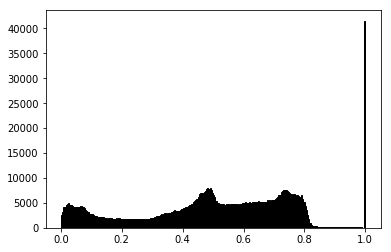

In [16]:
plt.hist((img__/255).ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')